## 10-Unsupervised-Learning - Day 1 - Supervised/Unsupervised, k-means

### Class Objectives

* Recognize the differences between supervised and unsupervised machine learning.
* Apply the k-means algorithm to identify clusters in a given dataset.
* Determine the optimal number of clusters for a dataset using the elbow method.

### Resources:
* [Teachable Machine project from Google](https://teachablemachine.withgoogle.com/v1/)
* [A.I. Experiments: Teachable Machine](https://youtu.be/3BhkeY974Rg)


### Install:
```
conda install scikit-learn -y
conda install -c pyviz hvplot -y

```

# ================================

### 1.01 Instructor Do: Clustering Explained (10 min)

In [1]:
# Import the modules
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [6]:
# Generate synthetic clusters
X, y = make_blobs(
    centers=3, 
    random_state=9
)

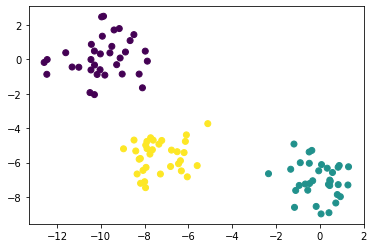

In [7]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
# Generate synthetic clusters
X, y = make_blobs(
    centers=9, 
    random_state=9
)

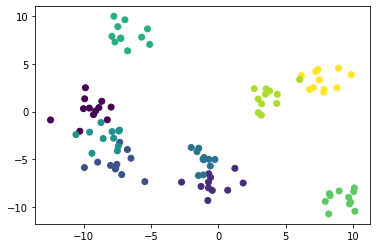

In [13]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
# Generate synthetic clusters
X, y = make_blobs(
    centers=5, 
    random_state=1
)

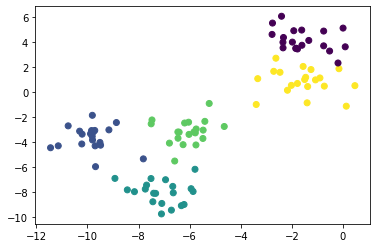

In [7]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
# Generate synthetic clusters
X, y = make_blobs(
    centers=3, 
    random_state=1
)

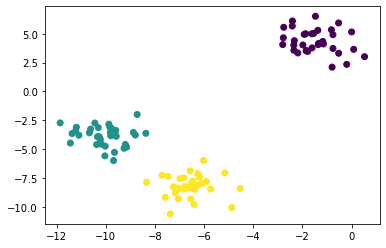

In [9]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

# ================================

### 1.02 Instructor Do: The K-means Algorithm (15 min)

In [14]:
# Import dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas

In [15]:
# Read in the CSV file as a Pandas DataFrame
service_ratings_df = pd.read_csv(
    Path("02-Ins_Kmeans/Resources/service_ratings.csv")
)

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [16]:
# Visualize a scatter plot of the data
service_ratings_df.hvplot.scatter(x="mobile_app_rating", y="personal_banker_rating")

:Scatter   [mobile_app_rating]   (personal_banker_rating)

* Run the k-means model with 2 clusters

In [17]:
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans

In [23]:
# Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=3, random_state=1)

# Print the model
model

KMeans(n_clusters=3, random_state=1)

In [24]:
# Fit the data to the instance of the model
model.fit(service_ratings_df)

KMeans(n_clusters=3, random_state=1)

In [25]:
# Make predictions about the data clusters using the trained model
customer_ratings = model.predict(service_ratings_df)

# Print the predictions
print(customer_ratings)

[0 2 1 1 1 1 2 2 1 1 2 1 2 2 0 2 1 2 1 1 2 2 1 2 1 0 1 2 1 0 2 1 2 0 2 1 1
 1 2 1 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 0 1 2 1 2 1 2 1 1 0 0 1 2 0 1 1 2
 1 2 0 1 2 2 2 0 1 2 2 2 1 2 0 1 2 1 2 2 0 2 0 2 1 2 0 2 2 1 2 2 1 1 2 2 1
 2 2 2 0 2 1 1 1 2 0 2 1 1 1 1 2 2 1 1 1 2 2 2 1 0 1 2 2 1 2 1 1 2 2 2 1 0
 2 1 1 1 0 2 2 2 0 2 2 2 1 2 0 1 2 1 1 1 1 0 2 1 0 2 2 1 2 2 2 1 2 0 2]


In [26]:
# Add a column to the DataFrame that contains the customer_ratings information
service_ratings_df['customer rating'] = customer_ratings

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating,customer rating
0,3.50,2.40,0
1,3.65,3.14,2
2,2.90,2.75,1
3,2.93,3.36,1
4,2.89,2.62,1


In [27]:
# Plot the data points based on the customer rating
service_ratings_df.hvplot.scatter(
    x="mobile_app_rating", 
    y="personal_banker_rating", 
    by="customer rating"
)

:NdOverlay   [customer rating]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

# ================================

### 1.03 Student Do: Segmenting Customers (15 min)

# Segmenting Customers

Your marketing department has just come back to you regarding the initial analysis you performed on the customer ratings for mobile application and an in-person banker services. Although your initial analysis of grouping the customers into two segments was helpful, they are wondering if the data could be even more finely clustered.

You have been asked to review how the customer ratings data looks when modeled with 3 and 4 clusters.

Using the information contained in the [starter file](03-Stu_Segmenting_Customers/Unsolved/segmenting_customers.ipynb), apply the K-means algorithm to the `service_ratings` data using both 3 and 4 clusters to segment the customer information.

## Instruction

1. Review the Pandas DataFrame and plot associated with the import of the "service_ratings.csv" file.

2. Run the K-means algorithm identifying 3 clusters in the data.

    * Create and initialize the K-means model for 3 clusters . Use a `random_state` value of 1 for the model.
    * Fit, or train, the model using the `service_ratings_df` DataFrame
    * Make predictions about the clustering using the trained model. Save the predictions to a variable called `customer_segment_3`, and print that variable.
    * Add a column called "customer_segment_3", and add the `customer_segment_3` information to the column.
    * Plot the data using the DataFrame adjusted to include customer segment information for 3 clusters.

3. Run the K-means algorithm identifying 4 clusters in the data.

    * Create and initialize the K-means model for 4 clusters . Use a `random_state` value of 1 for the model.
    * Fit, or train, the model using the `service_ratings_df` DataFrame
    * Make predictions about the clustering using the trained model. Save the predictions to a variable called `customer_segment_4`, and print that variable.
    * Add a column called "customer_segment_4", and add the `customer_segment_4` information to the column.
    * Plot the data using the DataFrame adjusted to include customer segment information for 4 clusters.

4. Answer the following question: Can any additional information be gleaned from the customer segmentation data when clusters of 3 and 4 are applied?

---

# Segmenting Customers

You have been asked to review how the customer ratings data looks when modeled with 3 and 4 clusters.

Using the information contained in this notebook, apply the K-means algrothim to the service_ratings data using both 3 and 4 clusters to segment the customer information.

In [44]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas

# Import the K-means algorithm
from sklearn.cluster import KMeans

In [45]:
# Read in the CSV file as a Pandas DataFrame
service_ratings_df = pd.read_csv(
    Path("03-Stu_Segmenting_Customers/Resources/service_ratings.csv")
)

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [46]:
# Visualize a scatter plot of the data
service_ratings_df.hvplot.scatter(
    x="mobile_app_rating", 
    y="personal_banker_rating"
)

:Scatter   [mobile_app_rating]   (personal_banker_rating)

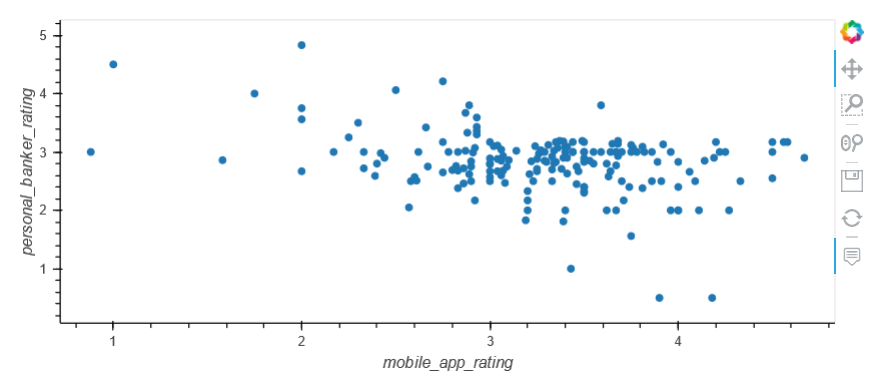

* Run the k-means model with 3 clusters

In [47]:
# Create and initialize the K-means model instance for 3 clusters
model_K3 = KMeans(n_clusters=3)
# Print the model
print(model_K3)

KMeans(n_clusters=3)


In [48]:
# Fit the data to the instance of the model
# YOUR CODE HERE
model_K3.fit(service_ratings_df)

KMeans(n_clusters=3)

In [49]:
# Make predictions about the data clusters using the trained model
customer_segment_3 = model_K3.predict(service_ratings_df)

# Print the predictions
print(customer_segment_3)

[2 1 0 0 0 0 1 1 0 0 1 2 1 1 2 1 0 1 0 0 1 1 0 1 0 2 0 1 0 2 1 0 1 2 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 2 0 1 0 1 0 1 0 0 2 2 0 1 2 0 0 1
 0 1 2 0 1 1 1 2 0 1 1 1 0 1 2 0 1 0 1 1 2 1 2 1 0 1 2 0 1 0 1 1 0 0 1 1 0
 1 1 1 2 1 0 0 0 1 2 1 0 0 0 0 1 1 0 0 0 1 1 1 0 2 0 1 1 1 1 0 0 1 1 1 0 2
 1 0 0 0 2 1 1 1 2 1 1 1 0 1 2 0 1 0 0 0 0 2 1 0 2 1 1 0 1 1 1 0 1 2 1]


In [50]:
# Add a column to the DataFrame that contains the customer_segment information
service_ratings_df['customer segment'] = customer_segment_3
# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating,customer segment
0,3.50,2.40,2
1,3.65,3.14,1
2,2.90,2.75,0
3,2.93,3.36,0
4,2.89,2.62,0


In [53]:
# Plot the data points based on the customer rating
# YOUR CODE HERE

service_ratings_df.hvplot.scatter(
    x='mobile_app_rating',
    y='personal_banker_rating',
    by='customer segment',
    title='Scatter plot'
)

:NdOverlay   [customer segment]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

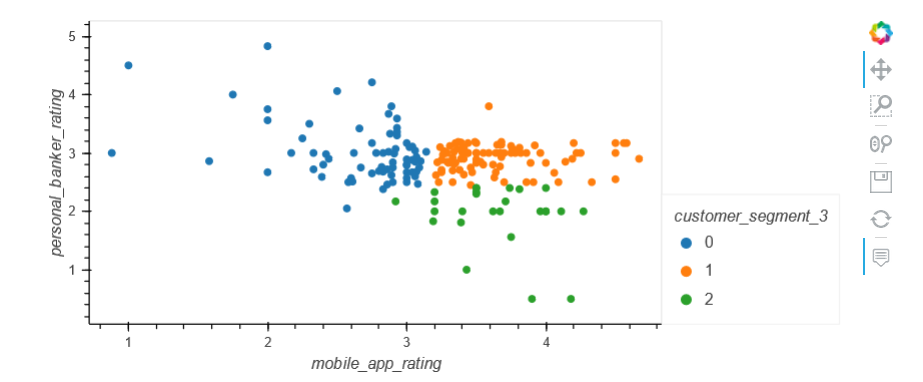

* Run the k-means model with 4 clusters

In [54]:
# Create and initialize the K-means model instance for 4 clusters
model_k4 = KMeans(n_clusters=4)

# Print the model
print(model_k4)

KMeans(n_clusters=4)


In [55]:
# Fit the data to the instance of the model
# YOUR CODE HERE
model_k4.fit(service_ratings_df)

KMeans(n_clusters=4)

In [56]:
# Make predictions about the data clusters using the trained model
# YOUR CODE HERE
customer_segment_4 = model_k4.predict(service_ratings_df)
# Print the predictions
print(customer_segment_4)

[2 0 1 1 1 1 0 0 1 3 0 2 0 0 2 0 1 0 1 1 0 0 1 0 1 2 3 0 1 2 0 1 0 2 0 1 1
 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 2 1 0 1 0 1 0 1 1 2 2 1 0 2 3 1 0
 1 0 2 1 0 0 0 2 3 0 0 0 3 0 2 3 0 1 0 0 2 0 2 0 1 0 2 1 0 1 0 0 1 3 0 0 1
 0 0 0 2 0 3 3 1 0 2 0 1 1 1 1 0 0 1 1 1 0 0 0 1 2 1 0 0 0 0 1 1 0 0 0 1 2
 0 1 3 1 2 0 0 0 2 0 0 0 1 0 2 1 0 1 1 1 1 2 0 1 2 0 0 3 0 0 0 1 0 2 0]


In [59]:
# Add a column to the DataFrame that contains the customer_segment information
# YOUR CODE HERE
service_ratings_df['Customer Segment (k=4)'] = customer_segment_4
# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating,customer segment,Customer Segment (k=4)
0,3.50,2.40,2,2
1,3.65,3.14,1,0
2,2.90,2.75,0,1
3,2.93,3.36,0,1
4,2.89,2.62,0,1


In [60]:
# Plot the data points based on the customer rating
# YOUR CODE HERE
service_ratings_df.hvplot.scatter(
    x='mobile_app_rating',
    y='personal_banker_rating',
    by='Customer Segment (k=4)',
    title='Scatter plot'
)

:NdOverlay   [Customer Segment (k=4)]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

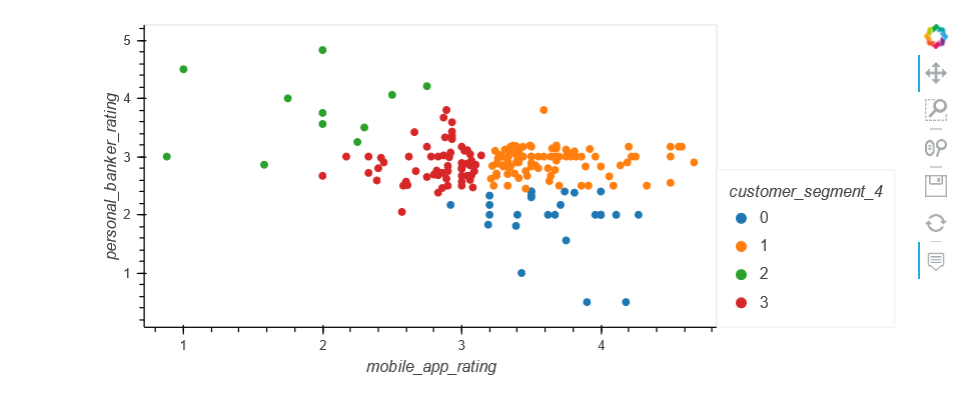

## Answer the following question

**Question:** Can any additional information be gleaned from the customer segmentation data when clusters of 3 and 4 are applied?

**Answers:** Segmenting the data into 4 clusters was quite insightful. What is designated as cluster 3, customers with the highest personal banker service ratings, really rated service received through the mobile application quite poorly. Those users will either continue to consume in-person banking services, or they should be contacted for additional assistance on using the mobile application.  

# ================================

### 1.04 Instructor Do: The Elbow Method (15 min)

In [61]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans

In [62]:
# Read in the CSV file as a Pandas DataFrame
service_ratings_df = pd.read_csv(
    Path("04-Ins_Elbow_Method/Resources/service_ratings.csv")
)

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [63]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [64]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(service_ratings_df)
    inertia.append(k_model.inertia_)

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [65]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,122.472196
1,2,77.080190
2,3,58.443470
3,4,42.595218
4,5,34.624700


In [66]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Using k-means with four clusters

In [67]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(service_ratings_df)

# Make predictions
k_4 = model.predict(service_ratings_df)

# Add a class column with the labels
service_ratings_df['customer_segment'] = k_4

In [68]:
# Plot the clusters
service_ratings_df.hvplot.scatter(
    x="mobile_app_rating",
    y="personal_banker_rating",
    by="customer_segment"
)

:NdOverlay   [customer_segment]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

# ================================

### 1.05 Student Do: Finding k (20 min)

# Finding k

You have been analyzing the pricing data on one of the stocks your firm owns. Specifically, you were examining the relationship between the day's trading volume and the spread between the high and low trading price.

Using the information contained in the [starter file](05-Stu_Finding_k/Unsolved/finding_k.ipynb), use the elbow method to determine the optimal number of clusters, `k`, that should be used to segment these trades. Once the elbow curve has been established, evaluate the two most likely values for `k` using the K-means algorithm and a scatter plot.

## Instructions

1. Read in the `stock_data.csv` file from the Resources folder and create a DataFrame. Set the “date” column to create the DatetimeIndex. Be sure to include parameters for `parse_dates` and `infer_datetime_format`.

2. Create two lists: one to hold the list of inertia scores and another for the range of k values (from 1 to 11) to analyze.

3. Using a for-loop to evaluate each instance of k, define a K-means model, fit the K-means model based on the DataFrame, and append the model’s inertia to the empty inertia list that you created in Step 2.

4. Store the values for k and the inertia in a Dictionary called `elbow_data`. Use `elbow_data` to create a Pandas DataFrame called `df_elbow`.

5. Using hvPlot, plot the `df_elbow` DataFrame to visualize the elbow curve.

6. Perform the following tasks for each of the two most likely values of `k`:

    * Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to the `spread_df` DataFrame.

    * Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "volume".

7. Answer the following question: Considering the plot, what’s the best number of clusters to choose, or value of k?

---

# Finding k

You have been analyzing the pricing data on one of the stocks your firm owns. Specifically, you were examining the relationship between the day's trading volume and the spread between the high and low trading price. Use the elbow method to determine the optimal number of clusters, `k`, that should be used to segment these trades. Once the elbow curve has been established, evaluate the two most likely values for `k` using the K-means algorithm and a scatter plot.

In [40]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans

* Read in the `stock_data.csv` file from the Resources folder and create a DataFrame. Set the “date” column to create the DatetimeIndex. Be sure to include parameters for `parse_dates` and `infer_datetime_format`.

In [69]:
# Read in the CSV file as a Pandas DataFrame
spread_df = pd.read_csv(
    Path("05-Stu_Finding_k/Resources/stock_data.csv"),
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
spread_df.head()

,close,volume,open,high,low,returns,hi_low_spread
date,,,,,,,
2009-04-30,3.61,18193730,3.55,3.73,3.53,0.028490,0.20
2009-05-01,3.82,16233940,3.55,3.90,3.55,0.058172,0.35
2009-05-04,4.26,21236940,3.90,4.30,3.83,0.115183,0.47
2009-05-05,4.32,16369170,4.36,4.39,4.11,0.014085,0.28
2009-05-06,4.31,15075630,4.45,4.45,4.12,-0.002315,0.33


* Create two lists: one to hold the list of inertia scores and another for the range of k values (from 1 to 11) to analyze.

In [70]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1,11 ))

* Using a for-loop to evaluate each instance of k, define a K-means model, fit the K-means model based on the DataFrame, and append the model’s inertia to the empty inertia list that you created in Step 2.

In [71]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
# YOUR CODE HERE

for i in k:
    model = KMeans(n_clusters=i)
    model.fit(spread_df)
    inertia.append(model.inertia_)
    

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  f"KMeans is known to have a memory leak on Windows "


* Store the values for k and the inertia in a Dictionary called `elbow_data`. Use `elbow_data` to create a Pandas DataFrame called `df_elbow`.

In [73]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {
    "k": k,
    'inertia': inertia
}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,2.835703e+18
1,2,9.903144e+17
2,3,4.999629e+17
3,4,3.062100e+17
4,5,2.101845e+17


* Using hvPlot, plot the `df_elbow` DataFrame to visualize the elbow curve.

In [74]:
# Plot the DataFrame
# YOUR CODE HERE
df_elbow.hvplot.line(
    x="k", 
    y= "inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

* Perform the following tasks for each of the two most likely values of `k`:

  * Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to the `spread_df` DataFrame.
  * Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "volume".

In [78]:
	close	volume	open	high	low	returns	hi_low_spread
date							
2009-04-30	3.61	18193730	3.55	3.73	3.53	0.028490	0.20
2009-05-01	3.82	16233940	3.55	3.90	3.55	0.058172	0.35
2009-05-04	4.26	21236940	3.90	4.30	3.83	0.115183	0.47
2009-05-05	4.32	16369170	4.36	4.39	4.11	0.014085	0.28
2009-05-06	4.31	15075630	4.45	4.45	4.12	-0.002315	0.33

In [78]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model_2 = KMeans(n_clusters=2, random_state=1)

# Fit the model
model_2.fit(spread_df)
# Make predictions
k_lower = model_2.predict(spread_df)

# Add a class column with the labels
spread_df['clusters_lower'] = k_lower

In [83]:
# Plot the clusters
# Plot the clusters
spread_df.hvplot.scatter(
    x="hi_low_spread",
    y="volume",
    by='clusters_lower'
)

:NdOverlay   [clusters_lower]
   :Scatter   [hi_low_spread]   (volume)

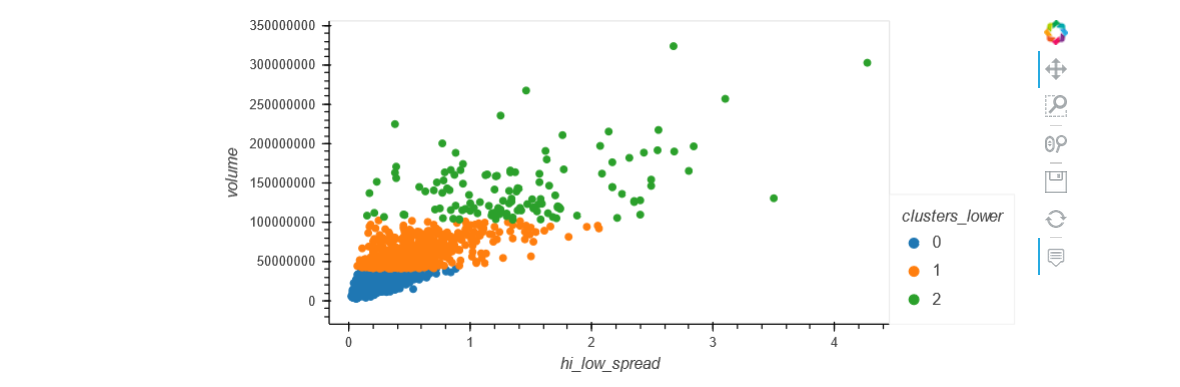

In [79]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model_7 = KMeans(n_clusters=7, random_state=1)

# Fit the model
model_7.fit(spread_df)
# Make predictions
k_higher = model_7.predict(spread_df)

# Add a class column with the labels
spread_df['clusters_higher'] = k_higher

In [85]:
# Plot the clusters
#Plot the clusters
spread_df.hvplot.scatter(
    x="hi_low_spread",
    y="volume",
    by='clusters_higher'
)

:NdOverlay   [clusters_higher]
   :Scatter   [hi_low_spread]   (volume)

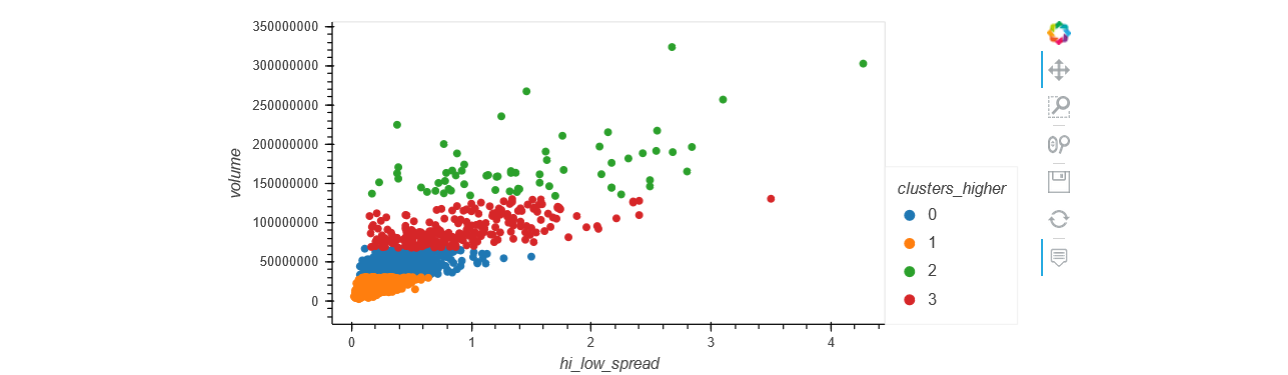

* Answer the following question:

**Question** Considering the plot, what’s the best number of clusters to choose, or value of k?

**Answer** From the scatter plots, it appears that the optimal value for k, the nubmer of clusters, is 3. It appears to better group the data points with high volumes and large spreads.

# ================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [86]:
title = "10-Unsupervised-Learning - Day 1 - Supervised/Unsupervised, k-means"
objectives = [
    "Recognize the differences between supervised and unsupervised machine learning",
    "Apply the k-means algorithm to identify clusters in a given dataset",
    "Determine the optimal number of clusters for a dataset using the elbow method",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))

Recognize the differences between supervised and unsupervised machine learning?  4
Apply the k-means algorithm to identify clusters in a given dataset?  3
Determine the optimal number of clusters for a dataset using the elbow method?  4


Self Evaluation for: 10-Unsupervised-Learning - Day 1 - Supervised/Unsupervised, k-means
------------------------
Recognize the differences between supervised and unsupervised machine learning. (4/5)
Apply the k-means algorithm to identify clusters in a given dataset. (3/5)
Determine the optimal number of clusters for a dataset using the elbow method. (4/5)
----------------------------------------------------------------
Average: 3.6666666666666665
